# Import Modules

In [51]:

import requests
import calendar
import time
import pandas as pd

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

# Import Data from the Vaush subreddit
## since pushift goes back until november I'll grab 1000 posts for every 15 days since Nov. 3rd

In [2]:

url = 'https://api.pushshift.io/reddit/search/submission'
params_11_3_15 = {
    'subreddit': 'VaushV',
    'limit': 1000,
    'filter': 'subreddit, selftext, title, created_utc',
    'since': 1667437261, #Thursday, November 3, 2022 1:01:01 AM
    'until': 1668474061 #Tuesday, November 15, 2022 1:01:01 AM
}

In [3]:
res = requests.get(url, params_11_3_15)
res.status_code


200

In [4]:
df_v1 = pd.DataFrame(res.json()['data'])
df_v1.head()

,subreddit,selftext,title,created_utc
0,VaushV,Seems like every time he makes an argument he ...,Anyone Noticing Vaush's Memory Issues Lately?,1668472458
1,VaushV,,Would be a shame if this unofficial site recei...,1668471465
2,VaushV,,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! ...,1668471209
3,VaushV,"Personally, IDK. It just seems like too many p...",How do you feel about the global population re...,1668470313
4,VaushV,"Right now, if Trump and Biden went for a remat...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418


In [5]:
df_v1.shape

(935, 4)

In [6]:
params_11_15_30 = {
    'subreddit': 'VaushV',
    'limit': 1000,
    'filter': 'subreddit, selftext, title, created_utc',
    'since': 1668474061, #Tuesday, November 15, 2022 1:01:01 AM
    'until': 1669770061 # Wednesday, November 30, 2022 1:01:01 AM
}

In [7]:
res = requests.get(url,params_11_15_30)
res.status_code

200

In [8]:
df_v2 = pd.DataFrame(res.json()['data'])
df_v2.head()

,subreddit,selftext,title,created_utc
0,VaushV,,Shoe's praising JQ'ing fascists on their talki...,1669769383
1,VaushV,,Hey guess who was in made it into Philip DeFra...,1669769076
2,VaushV,,U.S. Senate passes same-sex marriage protectio...,1669768298
3,VaushV,,Conservative views on nazis,1669768036
4,VaushV,,After Kanye’s historic appearance on Tim Pool’...,1669767662


In [9]:
df_v2.shape

(1000, 4)

In [10]:
params_12_1_15 = {
    'subreddit': 'VaushV',
    'limit': 1000,
    'filter': 'subreddit, selftext, title, created_utc',
    'since': 1669770061, # Wednesday, November 30, 2022 1:01:01 AM
    'until': 1671066061 # Thursday, December 15, 2022 1:01:01 AM
}

In [11]:
res = requests.get(url,params_12_1_15)
res.status_code

200

In [12]:
df_v3 = pd.DataFrame(res.json()['data'])
df_v3.head()

,subreddit,selftext,title,created_utc
0,VaushV,,“Putin’s Chef”: The Man Behind Russia’s Shadow...,1671064319
1,VaushV,,"Genuinely horrifying, I strongly recommend fol...",1671063808
2,VaushV,,Vowsh cameo,1671061384
3,VaushV,[https://youtu.be/\_MGTsSBU3OE?t=20](https://y...,Voosh cameo,1671061173
4,VaushV,Republicans are vile. Anybody that still votes...,Reminder: 164 House Republicans and 36 Senate ...,1671059395


In [13]:
df_v3.shape

(1000, 4)

In [14]:
params_12_15_31 = {
    'subreddit': 'VaushV',
    'limit': 1000,
    'filter': 'subreddit, selftext, title, created_utc',
    'since':  1671066061, # Thursday, December 15, 2022 1:01:01 AM
    'until': 1672448461 #Saturday, December 31, 2022 1:01:01 AM
}

In [15]:
res = requests.get(url,params_12_15_31)
res.status_code

200

In [16]:
df_v4 = pd.DataFrame(res.json()['data'])
df_v4.head()

,subreddit,selftext,title,created_utc
0,VaushV,,"These people sound great, they should be payed...",1672447768
1,VaushV,I have an eating disorder and honestly watchin...,Vaush saved my life…,1672447619
2,VaushV,,Lol stupid fuckers,1672446628
3,VaushV,I’m just going to go ahead and say it here.\nI...,Eternal Torment and Context,1672446192
4,VaushV,,title,1672440498


In [17]:
df_v4.shape

(1000, 4)

In [29]:
params_1_1_12 = {
    'subreddit': 'VaushV',
    'limit': 1000,
    'filter': 'subreddit, selftext, title, created_utc',
    'since': 1672448461, #Saturday, December 31, 2022 1:01:01 AM
    #'until': #1641992461 #Wednesday, January 12, 2022 1:01:01 PM
}

In [30]:
res = requests.get(url,params_1_1_12)
res.status_code

200

In [31]:
df_v5 = pd.DataFrame(res.json()['data'])
df_v5.head()

,subreddit,selftext,title,created_utc
0,VaushV,First things first: H3h3 said that Andrew basi...,Why I don't think what happened what happened ...,1673554537
1,VaushV,,Did the GOP downplay the existence of marital ...,1673554249
2,VaushV,,International Chinese students are forced to s...,1673553192
3,VaushV,,NE introduces bill to criminalize wearing clot...,1673551440
4,VaushV,,BadEmpanada now using the sexual assault AND s...,1673550508


In [32]:
df_v5.shape

(1000, 4)

In [33]:
vaush_df =pd.concat([df_v1,df_v2,df_v3,df_v4,df_v5])

In [34]:
vaush_df

,subreddit,selftext,title,created_utc
0,VaushV,Seems like every time he makes an argument he ...,Anyone Noticing Vaush's Memory Issues Lately?,1668472458
1,VaushV,,Would be a shame if this unofficial site recei...,1668471465
2,VaushV,,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! ...,1668471209
3,VaushV,"Personally, IDK. It just seems like too many p...",How do you feel about the global population re...,1668470313
4,VaushV,"Right now, if Trump and Biden went for a remat...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418
...,...,...,...,...
995,VaushV,,most sane south park fan,1672530673
996,VaushV,Someone posted a few days ago a poll asking wh...,"hot take: aside from Ukraine, the queen dying ...",1672529782
997,VaushV,,"So Pope Benedict XVI died, can we talk about w...",1672527544
998,VaushV,,"BreadPanes 162: ""Groomer's Dilemma""",1672525401


### drop duplicate row

In [39]:
vaush_df.drop_duplicates(inplace=True)

In [40]:
vaush_df.duplicated().sum()

0

In [41]:
vaush_df

,subreddit,selftext,title,created_utc
0,VaushV,Seems like every time he makes an argument he ...,Anyone Noticing Vaush's Memory Issues Lately?,1668472458
1,VaushV,,Would be a shame if this unofficial site recei...,1668471465
2,VaushV,,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! ...,1668471209
3,VaushV,"Personally, IDK. It just seems like too many p...",How do you feel about the global population re...,1668470313
4,VaushV,"Right now, if Trump and Biden went for a remat...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418
...,...,...,...,...
995,VaushV,,most sane south park fan,1672530673
996,VaushV,Someone posted a few days ago a poll asking wh...,"hot take: aside from Ukraine, the queen dying ...",1672529782
997,VaushV,,"So Pope Benedict XVI died, can we talk about w...",1672527544
998,VaushV,,"BreadPanes 162: ""Groomer's Dilemma""",1672525401


## Combine title and full text for easier eda

In [47]:
vaush_df['full_text']=vaush_df['title']+' ' +vaush_df['selftext']
vaush_df

,subreddit,selftext,title,created_utc,full_text
0,VaushV,Seems like every time he makes an argument he ...,Anyone Noticing Vaush's Memory Issues Lately?,1668472458,Anyone Noticing Vaush's Memory Issues Lately? ...
1,VaushV,,Would be a shame if this unofficial site recei...,1668471465,Would be a shame if this unofficial site recei...
2,VaushV,,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! ...,1668471209,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! ...
3,VaushV,"Personally, IDK. It just seems like too many p...",How do you feel about the global population re...,1668470313,How do you feel about the global population re...
4,VaushV,"Right now, if Trump and Biden went for a remat...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418,Hot take: Trump SHOULDN’T be arrested/indicted...
...,...,...,...,...,...
995,VaushV,,most sane south park fan,1672530673,most sane south park fan
996,VaushV,Someone posted a few days ago a poll asking wh...,"hot take: aside from Ukraine, the queen dying ...",1672529782,"hot take: aside from Ukraine, the queen dying ..."
997,VaushV,,"So Pope Benedict XVI died, can we talk about w...",1672527544,"So Pope Benedict XVI died, can we talk about w..."
998,VaushV,,"BreadPanes 162: ""Groomer's Dilemma""",1672525401,"BreadPanes 162: ""Groomer's Dilemma"""


In [48]:
vaush_df.isnull().sum()

subreddit      0
selftext       0
title          0
created_utc    0
full_text      0
dtype: int64

## Export DF before any futher edits take place that where I might accidently destroy data

In [74]:
vaush_df.to_csv('./data/vaush.csv')

In [9]:
vaush_df

,Unnamed: 0,subreddit,selftext,title,created_utc,full_text
0,0,VaushV,"Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",Anyone Noticing Vaush's Memory Issues Lately?,1668472458,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?"
1,1,VaushV,NaN,Would be a shame if this unofficial site received a lot of bad data,1668471465,Would be a shame if this unofficial site received a lot of bad data
2,2,VaushV,NaN,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,1668471209,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.
3,3,VaushV,"Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)",How do you feel about the global population reaching 8 billion?,1668470313,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)"
4,4,VaushV,"Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trump being held accountable or Stopping the rise o...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trum..."
...,...,...,...,...,...,...
4929,995,VaushV,NaN,most sane south park fan,1672530673,most sane south park fan
4930,996,VaushV,Someone posted a few days ago a poll asking what was the biggest political development of the year. The US election and roe v wade was posted but oddly the queen dying wasn't. There's a decent chance the commonwealth actually loses the majority of members (including maybe Australia and Canada) now and that the UK breaks up solely because Charles isn't as well liked as Elizabeth and now there's...,"hot take: aside from Ukraine, the queen dying probably will have the biggest political impact of all developments to happen this year",1672529782,"hot take: aside from Ukraine, the queen dying probably will have the biggest political impact of all developments to happen this year Someone posted a few days ago a poll asking what was the biggest political development of the year. The US election and roe v wade was posted but oddly the queen dying wasn't. There's a decent chance the commonwealth actually loses the majority of members (inclu..."
4931,997,VaushV,NaN,"So Pope Benedict XVI died, can we talk about why the man had such a massive knockoff ring? All the other popes rings are relatively regular sized.",1672527544,"So Pope Benedict XVI died, can we talk about why the man had such a massive knockoff ring? All the other popes rings are relatively regular sized."
4932,998,VaushV,NaN,"BreadPanes 162: ""Groomer's Dilemma""",1672525401,"BreadPanes 162: ""Groomer's Dilemma"""


## Import regular expression to clean up links

In [57]:
import re

pattern = re.compile('\[(.*?)\]\(.*?\)')


In [60]:
vaush_df

,Unnamed: 0,subreddit,selftext,title,created_utc,full_text
0,0,VaushV,"Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",Anyone Noticing Vaush's Memory Issues Lately?,1668472458,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?"
1,1,VaushV,NaN,Would be a shame if this unofficial site received a lot of bad data,1668471465,Would be a shame if this unofficial site received a lot of bad data
2,2,VaushV,NaN,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,1668471209,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.
3,3,VaushV,"Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)",How do you feel about the global population reaching 8 billion?,1668470313,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)"
4,4,VaushV,"Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trump being held accountable or Stopping the rise o...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trum..."
...,...,...,...,...,...,...
4929,995,VaushV,NaN,most sane south park fan,1672530673,most sane south park fan
4930,996,VaushV,Someone posted a few days ago a poll asking what was the biggest political development of the year. The US election and roe v wade was posted but oddly the queen dying wasn't. There's a decent chance the commonwealth actually loses the majority of members (including maybe Australia and Canada) now and that the UK breaks up solely because Charles isn't as well liked as Elizabeth and now there's...,"hot take: aside from Ukraine, the queen dying probably will have the biggest political impact of all developments to happen this year",1672529782,"hot take: aside from Ukraine, the queen dying probably will have the biggest political impact of all developments to happen this year Someone posted a few days ago a poll asking what was the biggest political development of the year. The US election and roe v wade was posted but oddly the queen dying wasn't. There's a decent chance the commonwealth actually loses the majority of members (inclu..."
4931,997,VaushV,NaN,"So Pope Benedict XVI died, can we talk about why the man had such a massive knockoff ring? All the other popes rings are relatively regular sized.",1672527544,"So Pope Benedict XVI died, can we talk about why the man had such a massive knockoff ring? All the other popes rings are relatively regular sized."
4932,998,VaushV,NaN,"BreadPanes 162: ""Groomer's Dilemma""",1672525401,"BreadPanes 162: ""Groomer's Dilemma"""


## copy df to apply regex pattern 

In [65]:
v_df = vaush_df.copy()
v_df['no_links'] = vaush_df['full_text'].apply(lambda x: pattern.sub(r'\1',str(x)))
v_df['no_links_2'] = v_df['no_links'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'http:\S+', '', regex=True).replace(r'&amp\S+','', regex = True).replace(r'\n','',regex = True).replace(r'\[removed\]','', regex=True).replace(r'\[deleted\]','', regex=True )

In [63]:
cvec.fit(vaush_df_coopy['no_links_2'])

CountVectorizer(ngram_range=(1, 5), stop_words='english')

In [23]:
vec_df = cvec.transform(vaush_df_coopy['no_links_2'])

In [24]:
vec_df = pd.DataFrame(vec_df.todense(), columns = cvec.get_feature_names_out())

In [25]:
vec_df.sum().sort_values(ascending=False).head(50)

people       1474
like         1145
just         1053
vaush         981
right         720
think         717
don           658
men           485
know          433
left          424
really        395
time          377
want          374
good          366
poll          346
make          344
view          311
way           310
twitter       309
ve            303
art           297
say           290
new           287
does          283
going         280
view poll     275
bad           269
ai            262
need          260
feel          259
actually      258
said          252
video         252
trans         250
did           247
women         246
lot           229
anti          225
things        223
shit          211
thing         211
state         210
doesn         205
shoe          200
isn           200
trump         200
person        200
saying        198
point         197
wing          196
dtype: int64

view poll                   275
right wing                  155
feel like                    97
ai art                       90
elon musk                    84
don know                     83
andrew tate                  82
don think                    72
far right                    69
trans people                 67
ve seen                      65
young men                    53
don want                     46
white people                 43
right wingers                40
tim pool                     40
free speech                  40
people like                  39
good faith                   39
year old                     35
looks like                   35
don like                     35
left wing                    34
alt right                    33
social media                 33
poll poll                    31
men issues                   31
black people                 31
climate change               30
matt walsh                   30
poll poll poll               29
don care

In [14]:
vaush_df_coopy['no_links_2'] = vaush_df_coopy['no_links'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'http:\S+', '', regex=True).replace(r'&amp\S+','', regex = True)

In [49]:
vaush_df_coopy

,Unnamed: 0,subreddit,selftext,title,created_utc,full_text,no_links,no_links_2
0,0,VaushV,"Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",Anyone Noticing Vaush's Memory Issues Lately?,1668472458,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?","Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?","Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?"
1,1,VaushV,NaN,Would be a shame if this unofficial site received a lot of bad data,1668471465,Would be a shame if this unofficial site received a lot of bad data,Would be a shame if this unofficial site received a lot of bad data,Would be a shame if this unofficial site received a lot of bad data
2,2,VaushV,NaN,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,1668471209,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.
3,3,VaushV,"Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)",How do you feel about the global population reaching 8 billion?,1668470313,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)","How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\nView Poll","How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\nView Poll"
4,4,VaushV,"Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trump being held accountable or Stopping the rise o...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trum...","Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unabl

In [27]:
v_df = vaush_df_coopy.copy()

# Check word count and post length

In [66]:
v_df['post_length']= v_df["no_links_2"].str.len()

In [67]:
v_df['post_word_count'] = v_df['no_links_2'].str.split().str.len()

In [68]:
v_df.drop(columns = ['selftext','title','created_utc','full_text','no_links','Unnamed: 0'],inplace = True)

# Sentiment Analysis 

In [69]:
analyzer = SentimentIntensityAnalyzer()
v_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in v_df['no_links_2']]
v_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in v_df['no_links_2']]
v_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in v_df['no_links_2']]
v_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in v_df['no_links_2']]
#plagiarized from
#https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets

In [70]:
v_df

,subreddit,no_links_2,post_length,post_word_count,compound,neg,neu,pos
0,VaushV,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",392,71,0.2869,0.035,0.899,0.065
1,VaushV,Would be a shame if this unofficial site received a lot of bad data,68,14,-0.7650,0.398,0.602,0.000
2,VaushV,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,78,11,0.0000,0.000,1.000,0.000
3,VaushV,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. View Poll",130,23,0.6081,0.078,0.661,0.261
4,VaushV,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would winBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up nextAnd Every(and I mean EVERY) poll shows Desantis beating BidenMe personally, I think Desantis is infinitely more dangerous than Trump So what’s more important? Trump being held acc...",443,71,-0.7458,0.142,0.796,0.061
...,...,...,...,...,...,...,...,...
4929,VaushV,most sane south park fan,25,5,0.3182,0.000,0.635,0.365
4930,VaushV,"hot take: aside from Ukraine, the queen dying probably will have the biggest political impact of all developments to happen this year Someone posted a few days ago a poll asking what was the biggest political development of the year. The US election and roe v wade was posted but oddly the queen dying wasn't. There's a decent chance the commonwealth actually loses the majority of members (inclu...",570,98,-0.6787,0.101,0.863,0.036
4931,VaushV,"So Pope Benedict XVI died, can we talk about why the man had such a massive knockoff ring? All the other popes rings are relatively regular sized.",147,27,-0.5574,0.126,0.874,0.000
4932,VaushV,"BreadPanes 162: ""Groomer's Dilemma""",36,4,-0.1779,0.362,0.638,0.000


In [71]:
v_df.to_csv('./data/vwsent.csv')

# Compare Sentiment Analysis

compound     -77.9468
neg          509.2380
neu         3915.6760
pos          494.0920
dtype: float64


Text(0.5, 1.0, 'Sum Of Vaush Sentiment Analysis Scores')

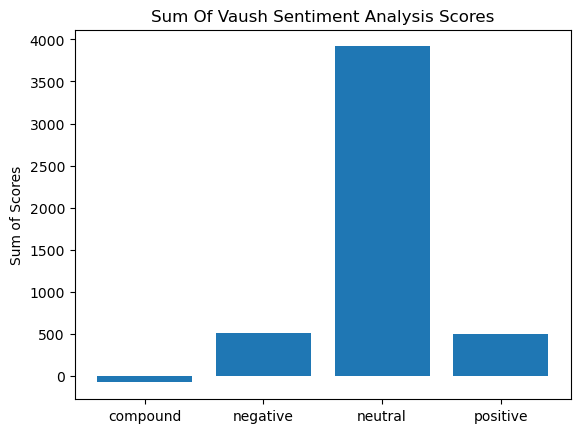

In [72]:
aux = np.sum(v_df[['compound','neg','neu','pos']], axis=0)
print(aux)
plt.bar(np.arange(4), aux)
plt.xticks(np.arange(4), ['compound','negative','neutral','positive']);
plt.ylabel('Sum of Scores')
plt.title('Sum Of Vaush Sentiment Analysis Scores')

# Compare Word Count


<AxesSubplot:xlabel='post_word_count', ylabel='Count'>

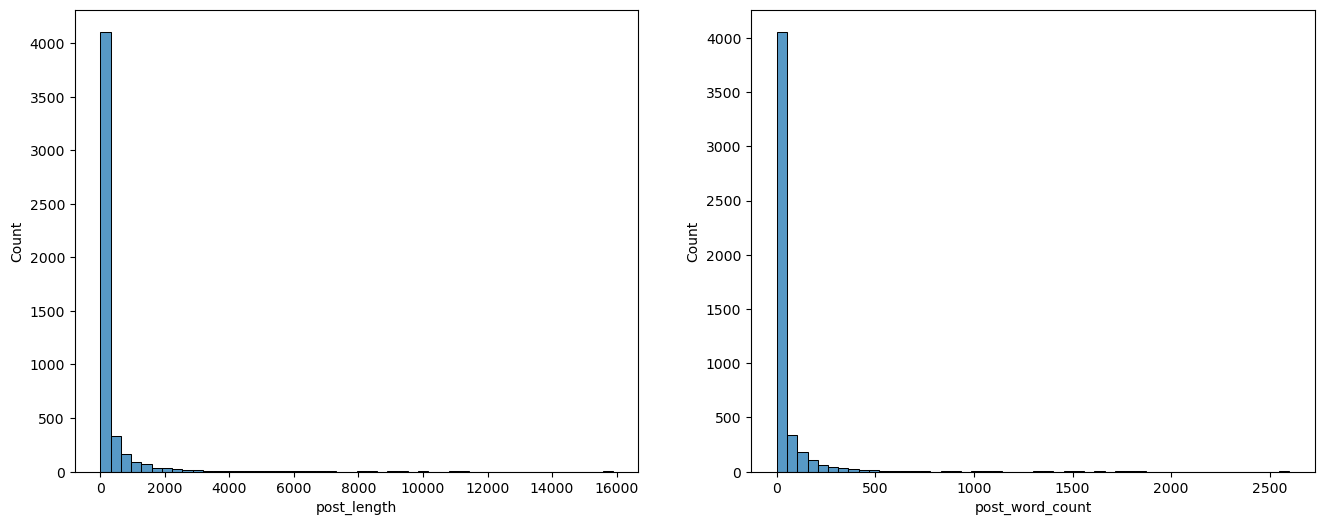

In [102]:
fig,ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(v_df['post_length'],ax=ax[0],bins=50)
sns.histplot(v_df['post_word_count'],ax=ax[1],bins=50)


post_length        1378226
post_word_count     237145
dtype: int64


Text(0.5, 1.0, 'Sum Of Vaush Word Counts and Post Lengths')

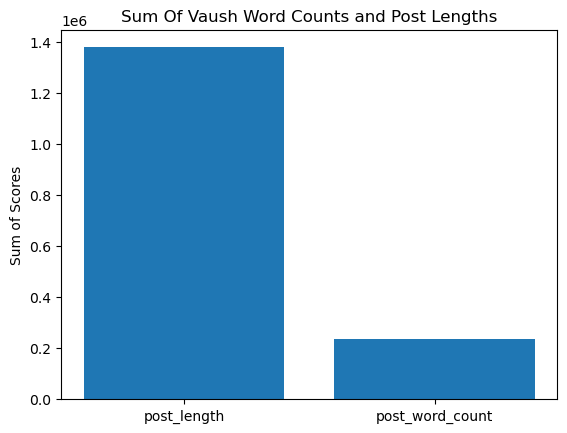

In [74]:
aux = np.sum(v_df[['post_length','post_word_count']], axis=0)
print(aux)
plt.bar(np.arange(2), aux)
plt.xticks(np.arange(2), ['post_length','post_word_count']);
plt.ylabel('Sum of Scores')
plt.title('Sum Of Vaush Word Counts and Post Lengths')

In [106]:
v_df['post_length'].max()

15881

In [107]:
v_df['post_word_count'].max()

2598

In [75]:
v_df['post_length'].mean()

279.33238751520065

In [104]:
v_df['post_length'].median()

75.0

In [76]:
v_df['post_word_count'].mean()

48.06343737332793

In [105]:
v_df['post_word_count'].median()

13.0

## Instantiate a count vecorizer to look for words or links I might have to clean

In [77]:
cvec = CountVectorizer(stop_words='english',ngram_range = (1, 5))

In [87]:
cvec = CountVectorizer(stop_words='english',ngram_range = (2, 2))

In [88]:
cvec.fit(v_df['no_links_2'])

CountVectorizer(ngram_range=(2, 2), stop_words='english')

In [89]:
vec_df = cvec.transform(v_df['no_links_2'])

In [90]:
vec_df

<4934x95225 sparse matrix of type '<class 'numpy.int64'>'
	with 109379 stored elements in Compressed Sparse Row format>

In [91]:
vec_df.todense

<bound method spmatrix.todense of <4934x95225 sparse matrix of type '<class 'numpy.int64'>'
	with 109379 stored elements in Compressed Sparse Row format>>

In [92]:
vec_df = pd.DataFrame(vec_df.todense(), columns = cvec.get_feature_names_out())

In [93]:
vec_df.sum().sort_values(ascending=False).head(50)

view poll          244
right wing         155
feel like           97
ai art              90
elon musk           84
don know            83
andrew tate         80
don think           72
far right           69
trans people        67
ve seen             65
young men           53
don want            46
white people        43
tim pool            40
right wingers       40
free speech         40
people like         39
good faith          39
year old            35
don like            35
looks like          35
left wing           34
social media        33
alt right           33
men issues          31
black people        31
matt walsh          30
climate change      30
poll poll           30
don care            28
jordan peterson     27
lot people          27
united states       26
like people         26
feels like          25
new york            25
guys think          25
years ago           25
people just         24
like vaush          24
mental health       24
think vaush         24
just like  

Text(0.5, 1.0, 'Top Vaush 2 Word Combos')

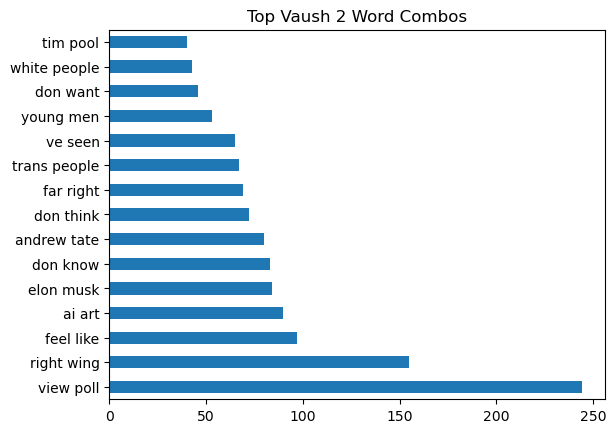

In [95]:
vec_df.sum().sort_values(ascending = False).head(15).plot(kind = 'barh');
plt.title('Top Vaush 2 Word Combos')

In [ ]:
## Fit no links to a CV to see what is left to clean

In [96]:
cvec_2_5 = CountVectorizer(stop_words='english',ngram_range = (1, 1))

In [97]:
cvec_2_5.fit(v_df['no_links_2'])

CountVectorizer(stop_words='english')

In [98]:
vec_df_2 = cvec_2_5.transform(v_df['no_links_2'])
vec_df_2 = pd.DataFrame(vec_df_2.todense(), columns = cvec_2_5.get_feature_names_out())

In [99]:
vec_df_2.sum().sort_values(ascending=False).head(50)

people      1473
like        1145
just        1053
vaush        981
right        720
think        717
don          658
men          485
know         432
left         424
really       395
time         377
want         374
good         365
poll         344
make         344
way          310
twitter      307
ve           303
art          297
say          290
new          286
does         283
going        280
view         279
bad          269
ai           262
need         260
feel         259
actually     258
said         252
video        252
trans        249
did          246
women        246
lot          229
anti         225
things       222
thing        211
state        210
shit         210
doesn        205
isn          200
trump        200
person       200
shoe         200
saying       198
point        196
wing         196
got          194
dtype: int64

Text(0.5, 1.0, 'Top r/Vaush Words')

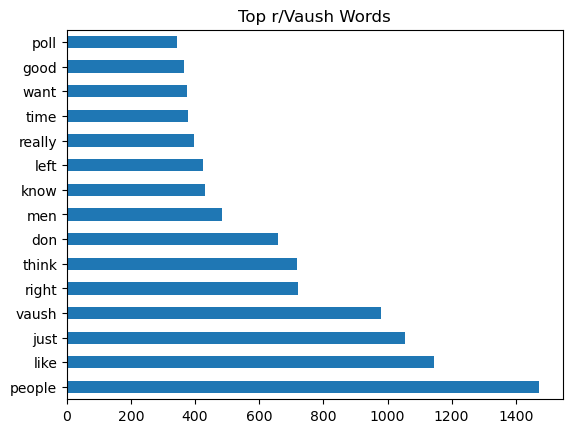

In [100]:
vec_df_2.sum().sort_values(ascending = False).head(15).plot(kind = 'barh');
plt.title('Top r/Vaush Words')
